# Analyse des prix des Airbnb de New-York City

Vous êtes Data Analyst chez Airbnb et êtes missionné(e) pour comprendre les données spécifiques à New-York afin de faire les meilleures recommandations. 

Le travail qui vous est demandé contient nécessaire deux parties, mais peut être poussé plus loin en fonction du temps que vous avez et des idées que vous proposez.

- Vous devez faire une "Exploratory Data Analysis" (EDA) complète du jeu de données. 
Plusieurs questions clefs sont mentionnées, n'hésitez pas à apporter vous même un regard neuf sur les données, à faire des analyses complémentaires, à les interpreter et commenter.
- Vous devez produire un modèle prédictif du prix d'un logement Airbnb, ce modèle servira à conseiller au mieux les clients (propriétaires d'appartement) sur le prix qu'ils peuvent proposer à leurs hôtes. 

Votre déliverable contient ce notebook d'analyses ainsi qu'une présentation type powerpoint que vous ferez telle que si vous aviez été en face du Chief Data Officer d'Airbnb (vous aurez 20 minutes + 10 minutes questions). Vous devrez m'envoyer une version presque finie du notebook la veille de votre soutenance à 12h. 

Naturellement, ce notebook doit être commenté et écrit de façon claire et lisible (en respectant au mieux les règles - voir sur en ligne - pour écrire proprement du code). 

## Données 

### Packages 

Structurez votre code en regroupant tous les packages utilisés ici. Cela permet notamment d'installer les packages manquant avec '!pip install' dès le début du notebook si besoin.

In [2]:
#!pip install pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

### Téléchargement 

Les données peuvent être téléchargées avec le lien suivant :
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/download

Elles doivent être décompressées, puis placées dans le répertoire contenant ce notebook.

Elles contiennent un fichier CSV "AB_NYC_2019.csv" ainsi qu'une carte de NYC "New_York_City_.png" vous permettant de représenter graphiquement certaines de vos analyses.

In [4]:
AB_NYC_2019 = pd.read_csv("AB_NYC_2019.csv")
data = pd.DataFrame(AB_NYC_2019)

### Transformations 

Vous pouvez transformer les données comme bon vous semble (Data Cleaning - Data Preparation).

In [5]:
# liste des colonne qu'on pense etre utile
features = ['neighbourhood_group','neighbourhood','room_type','reviews_per_month']
var_cat = ['neighbourhood_group','neighbourhood','room_type'] #Variables catégorielles

data = pd.get_dummies(data,columns=["room_type"])
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150,3,0,NaN,NaN,1,365,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
room_type_Entire home/apt         48895 non-null uint8


In [6]:
AB_NYC_2019.groupby('room_type').mean()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,1.843818e+07,6.175593e+07,40.728649,-73.960696,211.794246,8.506907,22.842418,1.306578,10.698335,111.920304
Private room,1.946893e+07,7.247514e+07,40.729208,-73.942924,89.780973,5.377900,24.112962,1.445209,3.227717,111.203933
Shared room,2.300378e+07,1.026241e+08,40.730514,-73.943343,70.127586,6.475000,16.600000,1.471726,4.662931,162.000862


In [7]:
data.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
New Dorp                 1
Fort Wadsworth           1
Richmondtown             1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [8]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150,3,0,NaN,NaN,1,365,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0


In [9]:
#Visualisation la table des correlations
AB_NYC_2019.corr().style.background_gradient(cmap='coolwarm')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1,0.58829,-0.00312529,0.0909085,0.0106187,-0.0132245,-0.31976,0.291828,0.133272,0.0854676
host_id,0.58829,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.296417,0.15495,0.203492
latitude,-0.00312529,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0101416,0.0195174,-0.0109835
longitude,0.0909085,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.145948,-0.114713,0.0827307
price,0.0106187,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0306083,0.0574717,0.0818288
minimum_nights,-0.0132245,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.121702,0.12796,0.144303
number_of_reviews,-0.31976,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.549868,-0.0723761,0.172028
reviews_per_month,0.291828,0.296417,-0.0101416,0.145948,-0.0306083,-0.121702,0.549868,1,-0.00942116,0.185791
calculated_host_listings_count,0.133272,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.00942116,1,0.225701
availability_365,0.0854676,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.185791,0.225701,1


On constate une correlation moyenne et positive entre l'id et le host_id  et entre reviews_per_month et number_of_reviews


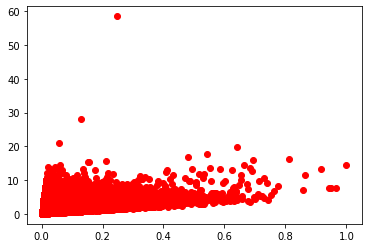

In [10]:
#Visualisation du host_id en fonction de id, puis du reviews_per_month en fonction du number_of_reviews

#plt.plot(AB_NYC_2019.id/AB_NYC_2019.id.max(),AB_NYC_2019.host_id,'r+')
plt.plot(AB_NYC_2019.number_of_reviews/AB_NYC_2019.number_of_reviews.max(),AB_NYC_2019.reviews_per_month,'ro')

In [11]:
AB_NYC_2019[AB_NYC_2019.number_of_reviews == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [12]:
AB_NYC_2019.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [32]:
manhattan = AB_NYC_2019.groupby('neighbourhood_group').neighbourhood.value_counts()['Manhattan']
brooklyn = AB_NYC_2019.groupby('neighbourhood_group').neighbourhood.value_counts()['Brooklyn']
queens = AB_NYC_2019.groupby('neighbourhood_group').neighbourhood.value_counts()['Queens']
bronx = AB_NYC_2019.groupby('neighbourhood_group').neighbourhood.value_counts()['Bronx']
staten_island  = AB_NYC_2019.groupby('neighbourhood_group').neighbourhood.value_counts()['Staten Island']


In [18]:
a = pd.DataFrame(data.groupby(["neighbourhood_group","neighbourhood"]))

In [29]:
b = data.groupby(["neighbourhood_group","neighbourhood"]).agg({
  'number_of_reviews' : ['min','mean','max','median']  
})


MultiIndex([(        'Bronx',          'Allerton'),
            (        'Bronx',        'Baychester'),
            (        'Bronx',           'Belmont'),
            (        'Bronx',         'Bronxdale'),
            (        'Bronx',       'Castle Hill'),
            (        'Bronx',       'City Island'),
            (        'Bronx', 'Claremont Village'),
            (        'Bronx',      'Clason Point'),
            (        'Bronx',        'Co-op City'),
            (        'Bronx',         'Concourse'),
            ...
            ('Staten Island',       'South Beach'),
            ('Staten Island',        'St. George'),
            ('Staten Island',         'Stapleton'),
            ('Staten Island',         'Todt Hill'),
            ('Staten Island',     'Tompkinsville'),
            ('Staten Island',       'Tottenville'),
            ('Staten Island',     'West Brighton'),
            ('Staten Island',       'Westerleigh'),
            ('Staten Island',       'Willowbrook

In [33]:
# min mean max med de visite d'anonnce total.Les anonnce sont regroupé par arrondissement et par quartier.
Bronx = b.loc['Bronx']
Manhattan = b.loc['Manhattan']
Queens = b.loc['Queens']
Brooklyn = b.loc['Brooklyn']
Staten_Island = b.loc['Staten Island']

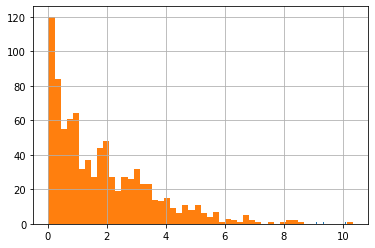

In [78]:

h0 = data[data.neighbourhood_group == "Brooklyn"].reviews_per_month
h1 = data[data.neighbourhood_group == "Manhattan"].reviews_per_month
h2 = data[data.neighbourhood_group == "Queens"].reviews_per_month
h3 = data[data.neighbourhood_group == "Staten Island"].reviews_per_month
h4 = data[data.neighbourhood_group == "Bronx"].reviews_per_month
#h1[h1<=h1.max()].hist(bins = 50)
#h2[h2<=h2.max()].hist(bins = 50)
h3[h3<=h3.max()].hist(bins = h3.count())
h4[h4<=h4.max()].hist(bins = 50)

In [66]:
a.head()

,0,1
0,"(Bronx, Allerton)",id ...
1,"(Bronx, Baychester)",id ...
2,"(Bronx, Belmont)",id ...
3,"(Bronx, Bronxdale)",id ...
4,"(Bronx, Castle Hill)",id ...


neighbourhood_group = arrondissement
neighbourhood = quartier
Pour 0 number_of_reviews il y a que des nans dans last_review et dans reviews_per_month

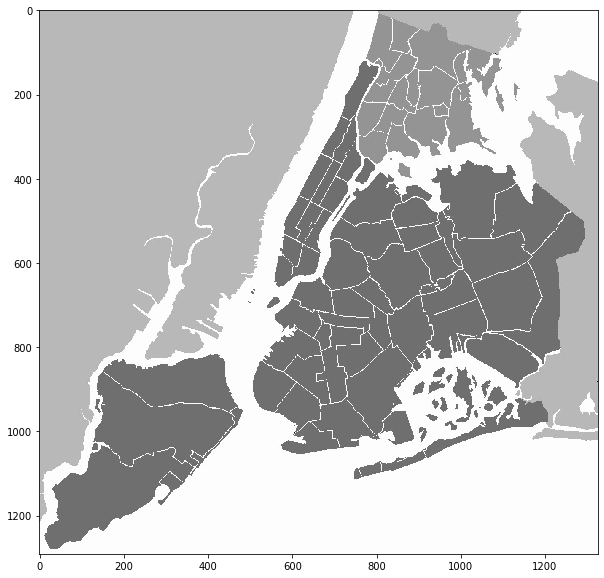

In [80]:
plt.rcParams["figure.figsize"] = (20,10)
nyc = mpimg.imread('New_York_City_.png', 0)
plt.imshow(nyc)
plt.show()

## Exploratory Data Analysis

### Questions requises

Pour chacune de ces questions, il vous est demandé d'analyser finement et de conserver et commenter les analyses / graphiques qui vous semblent pertinents.

#### Description des variables

Analysez et commentez les distributions des valeurs prises par les variables catégorielles et quantitatives.

#### Impact sur le prix 

Analysez et commentez le rôle joué par les différentes variables sur le prix de location.

#### Corrélations 

Analysez et commentez les corrélations entre les différentes variables (quantitatives ? catégorielles ?).

#### Géographie

Proposez une analyse intéressante et visuelle grâce à la carte de NYC.

### Analyses complémentaires 

## Prédiction du prix 

### Preprocessing

Vous pouvez préprocesser les données / créer des nouvelles variables pertinentes.

### Modèles

Vous devrez tester différents models (en appliquant un split Train Test à 70%) pour comparer leurs précisions (Root Mean Square Error - RMSE) et les discriminer (Bayesian Information Criteria - BIC).

Il vous est demandé de traiter a minima un modèle linéaire, et un modèle à base d'arbres. Cherchez également à analyser l'importance des différentes variables dans vos modèles.

#### Modèle selectionné et résultats

Expliquez ici pourquoi vous choisissez un certain modèle et ses résultats.